In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health_armaan.csv", parse_dates=["date"]).sort_values("date").reset_index(drop=True)

# Calendar helpers (just in case)
df["year_month"] = df["date"].dt.to_period("M")


In [16]:
def remove_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.where((series >= lower) & (series <= upper))


In [21]:
mobility_cols = [
    "WalkingSpeed","WalkingStepLength","WalkingAsymmetryPercentage",
    "WalkingDoubleSupportPercentage","SixMinuteWalkTestDistance",
    "AppleWalkingSteadiness","MobilityIndex","StabilityIndex"
]

for col in mobility_cols:
    if col in df.columns:
        before = df[col].notna().sum()
        df[col] = remove_outliers_iqr(df[col])
        after = df[col].notna().sum()
        print(f"{col}: removed {before - after} outliers")


WalkingSpeed: removed 96 outliers
WalkingStepLength: removed 99 outliers
WalkingAsymmetryPercentage: removed 95 outliers
WalkingDoubleSupportPercentage: removed 98 outliers
SixMinuteWalkTestDistance: removed 3 outliers
AppleWalkingSteadiness: removed 3 outliers
MobilityIndex: removed 160 outliers
StabilityIndex: removed 146 outliers


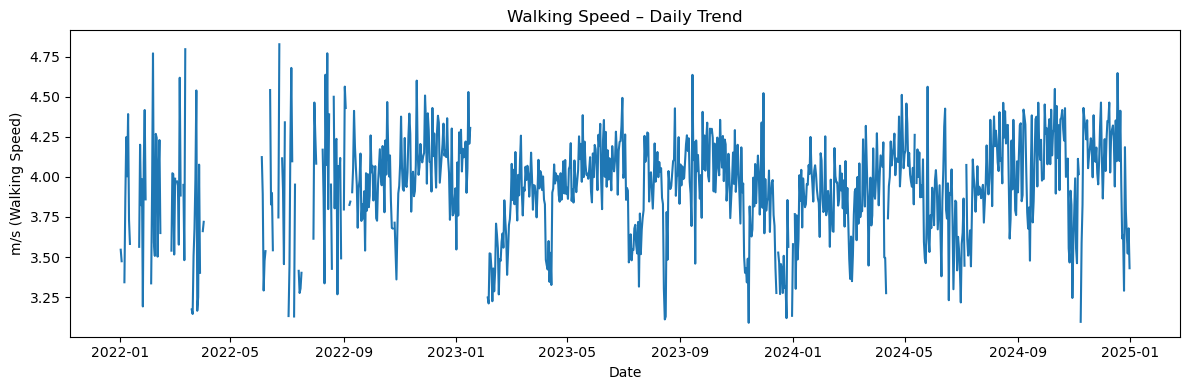

In [22]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["WalkingSpeed"])
plt.title("Walking Speed – Daily Trend")
plt.xlabel("Date"); plt.ylabel("m/s (Walking Speed)")
plt.tight_layout(); plt.show()


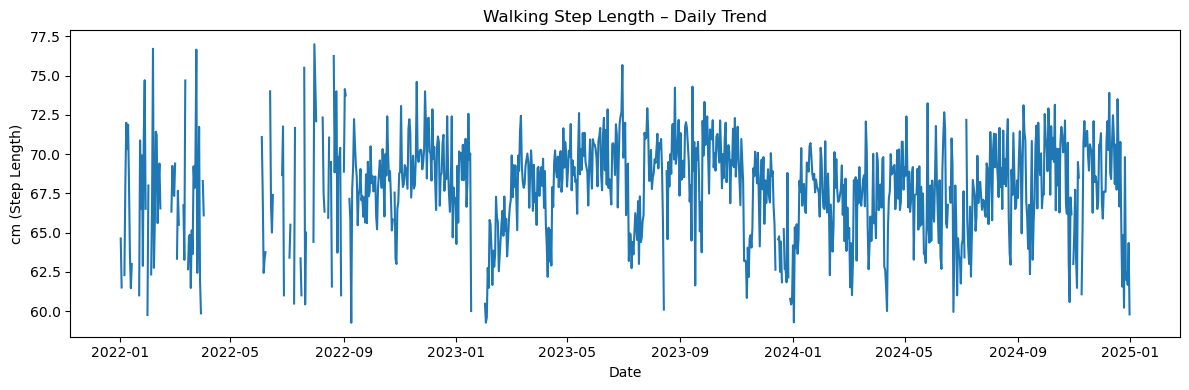

In [23]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["WalkingStepLength"])
plt.title("Walking Step Length – Daily Trend")
plt.xlabel("Date"); plt.ylabel("cm (Step Length)")
plt.tight_layout(); plt.show()


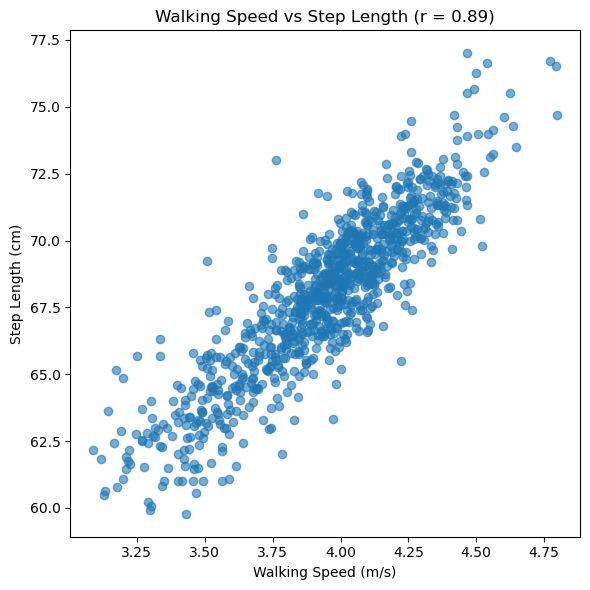

In [24]:
mask = df["WalkingSpeed"].notna() & df["WalkingStepLength"].notna()
r = df.loc[mask, ["WalkingSpeed","WalkingStepLength"]].corr().iloc[0,1]

plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"WalkingSpeed"], df.loc[mask,"WalkingStepLength"], alpha=0.6)
plt.title(f"Walking Speed vs Step Length (r = {r:.2f})")
plt.xlabel("Walking Speed (m/s)"); plt.ylabel("Step Length (cm)")
plt.tight_layout(); plt.show()


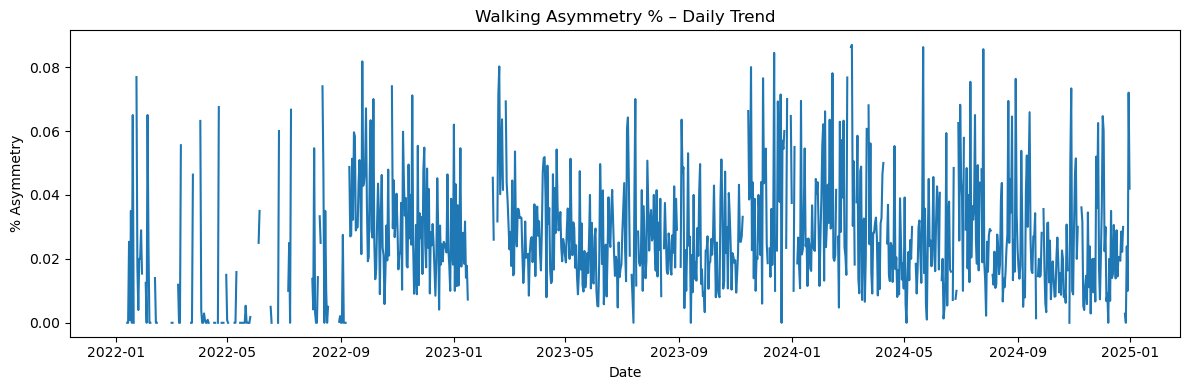

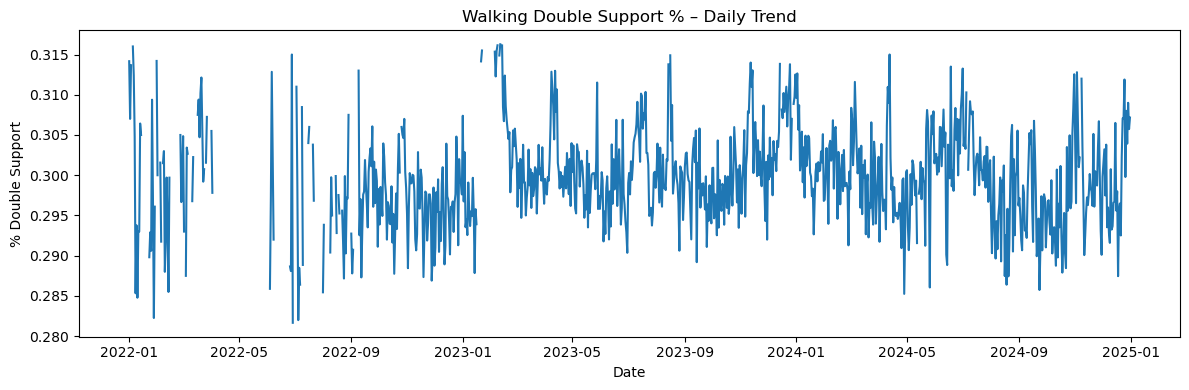

In [25]:
plt.figure(figsize=(12,4))
plt.plot(df["date"], df["WalkingAsymmetryPercentage"])
plt.title("Walking Asymmetry % – Daily Trend")
plt.xlabel("Date"); plt.ylabel("% Asymmetry")
plt.tight_layout(); plt.show()

plt.figure(figsize=(12,4))
plt.plot(df["date"], df["WalkingDoubleSupportPercentage"])
plt.title("Walking Double Support % – Daily Trend")
plt.xlabel("Date"); plt.ylabel("% Double Support")
plt.tight_layout(); plt.show()


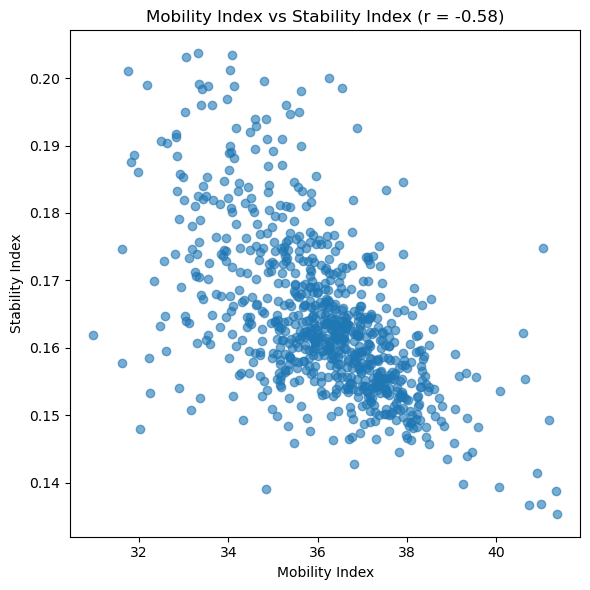

In [26]:
mask = df["MobilityIndex"].notna() & df["StabilityIndex"].notna()
r = df.loc[mask, ["MobilityIndex","StabilityIndex"]].corr().iloc[0,1]

plt.figure(figsize=(6,6))
plt.scatter(df.loc[mask,"MobilityIndex"], df.loc[mask,"StabilityIndex"], alpha=0.6)
plt.title(f"Mobility Index vs Stability Index (r = {r:.2f})")
plt.xlabel("Mobility Index"); plt.ylabel("Stability Index")
plt.tight_layout(); plt.show()
